In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline
from folium.plugins import HeatMap


The Eda is on Boston Data CrimeAnalysis I use Seaborn for Attractive plots and folium to create a map.

In [2]:
df=pd.read_csv("crime.csv",encoding='latin-1')

In [3]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [4]:
# Droping Unnecessary 
df=df.drop(['INCIDENT_NUMBER','OFFENSE_CODE','OFFENSE_DESCRIPTION','Location','UCR_PART'],axis=1)


In [5]:
#Treating Missing Values
df.isnull().sum()



OFFENSE_CODE_GROUP         0
DISTRICT                1765
REPORTING_AREA             0
SHOOTING              318054
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
STREET                 10871
Lat                    19999
Long                   19999
dtype: int64

In [6]:
df['SHOOTING']=df["SHOOTING"].fillna('N')
df["OCCURRED_ON_DATE"]=pd.to_datetime(df["OCCURRED_ON_DATE"])


In [7]:
#Rename columns 
rename={'OFFENSE_CODE_GROUP':'Group',
         'DISTRICT':'District',
         'REPORTING_AREA':'Area',
         'SHOOTING':'Shooting',
         'OCCURRED_ON_DATE':'Date',
         'YEAR':'Year',
         'MONTH':'Month',
         'DAY_OF_WEEK':'Day',
         'HOUR':'Hour',
         'STREET':'Street'}
df.rename(index=str,columns=rename,inplace=True)
#Check
df.head()

,Group,District,Area,Shooting,Date,Year,Month,Day,Hour,Street,Lat,Long
0,Larceny,D14,808,N,2018-09-02 13:00:00,2018,9,Sunday,13,LINCOLN ST,42.357791,-71.139371
1,Vandalism,C11,347,N,2018-08-21 00:00:00,2018,8,Tuesday,0,HECLA ST,42.306821,-71.060300
2,Towed,D4,151,N,2018-09-03 19:27:00,2018,9,Monday,19,CAZENOVE ST,42.346589,-71.072429
3,Investigate Property,D4,272,N,2018-09-03 21:16:00,2018,9,Monday,21,NEWCOMB ST,42.334182,-71.078664
4,Investigate Property,B3,421,N,2018-09-03 21:05:00,2018,9,Monday,21,DELHI ST,42.275365,-71.090361


Which Type of Crime Occur very frequrntly

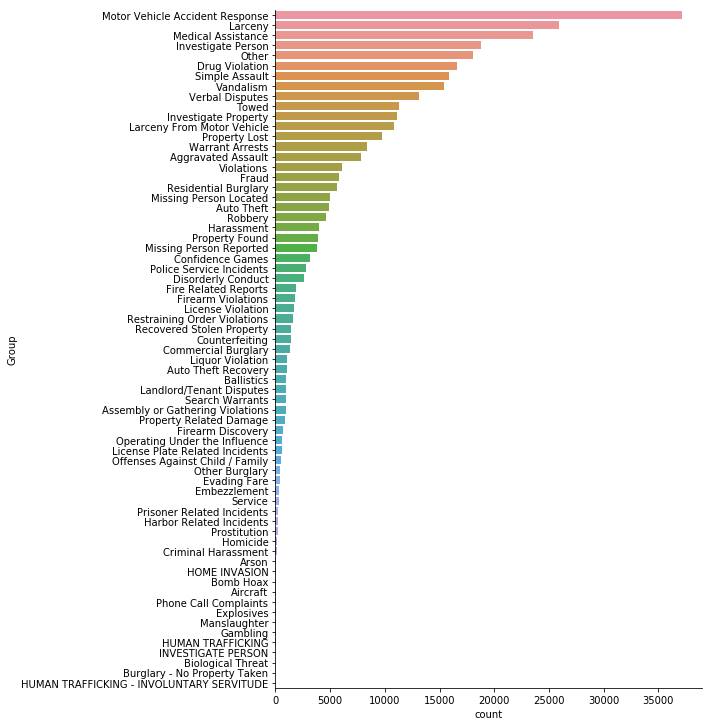

In [8]:
sns.catplot(y='Group',kind='count',order=df["Group"].value_counts().index,data=df,height=10, aspect=1.0)

By Visulization i found that the most frequntly commited crimes are :-
1 Motor Vehicle Accident
2 Larency
3 Medical Assisstance

#On Which Hour does Serious Most Crime Occur


Text(9.925000000000004, 0.5, 'Count')

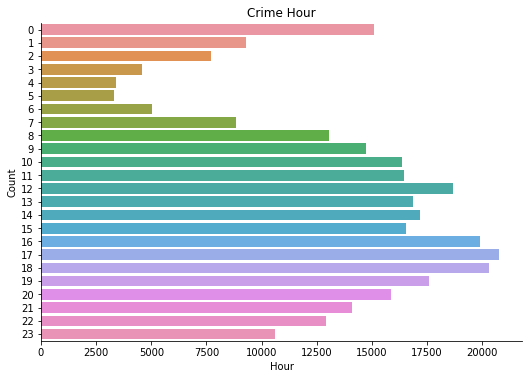

In [9]:
sns.catplot(y='Hour',kind='count',data=df,aspect=1.5)
plt.title("Crime Hour")
plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Count', fontsize=10)

Most Crime Occur at :-
  16:4Pm.
  17:5PM,
  18:6PM,
  12:12PM,

On Which Day Most Crime occurs

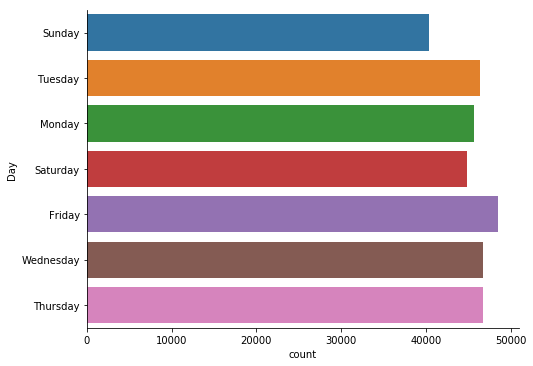

In [10]:
sns.catplot(y='Day',data=df,kind='count',aspect=1.5)

Most crime occur on the days:- Tuesday, Friday, Wednesday
least Crime Day=Sunday


IN Which Distict  Crime occur Mostly

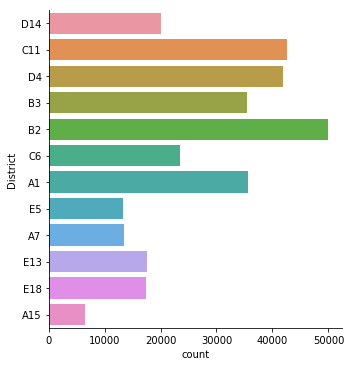

In [11]:
sns.catplot(y='District',data=df,kind='count')

Most Safe Distict: A15
Unsafe Distict: 1  B2
                2  C11
                3  D4

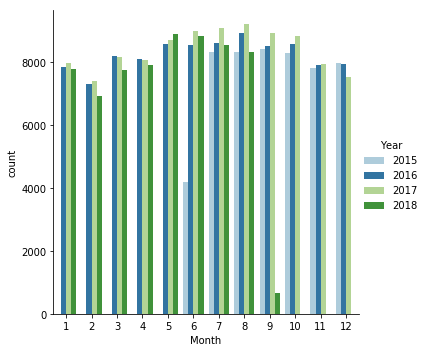

In [26]:
sns.catplot(x="Month", hue="Year", kind="count", palette="Paired", data=df)



In [ ]:
EDA Summary:-
1 Larceny is by far the most common type of serious crime.
2 Serious crimes are most likely to occur in the afternoon and evening.
3 Serious crimes are most likely to occur on Friday and least likely to occur on Sunday.
4 Serious crimes are most likely to occur in the summer and early fall, and least likely to occur in the winter (with the exeption of January, which has a crime rate more similar to the summer).
5 There is no obvious connection between major holidays and crime rates.
6 Serious crimes are most commn the city center, especially districts A1 and D4.